## [Shuai10](http://dx.doi.org/10.1039/b816406c)
Computational methods for design of organic materials with high charge mobility. L. Wang, G. Nan, X. Yang, Q. Peng, Q. Li and Z. Shuai, *Chem. Soc. Rev.* **2010**, *39*, 423.

Fig. 5 - transfer integral.

## [Nan09JCP](https://doi.org/10.1063/1.3055519)
Charge transfer rates in organic semiconductors beyond first-order perturbation: From weak to strong coupling regimes. G. Nan, L. Wang, X. Yang, Z. Shuai, Y. Zhao. *J. Chem. Phys.*, **2009**, *130*, 024704.

Fig. 4 - transfer integral

See also [Valeev06jacs](https://pubs.acs.org/doi/10.1021/ja061827h) Eq.10 for the final expression of transfer integral in terms of orthonormal orbitals.

In [4]:
import numpy as np
np.set_printoptions(linewidth=250)
import pyscf

### Building pentacene dimer

In [5]:
atom1 = atom = """
C 0.000000 0.000000 1.406683
C 0.000000 1.224532 0.727541
C 0.000000 2.463824 1.406276
C 0.000000 3.672444 0.726656
C 0.000000 4.934586 1.408386
C 0.000000 6.108003 0.715689
C 0.000000 0.000000 -1.406683
C 0.000000 1.224532 -0.727541
C 0.000000 2.463824 -1.406276
C 0.000000 3.672444 -0.726656
C 0.000000 4.934586 -1.408386
C 0.000000 6.108003 -0.715689
C 0.000000 -1.224532 -0.727541
C 0.000000 -2.463824 -1.406276
C 0.000000 -3.672444 -0.726656
C 0.000000 -4.934586 -1.408386
C 0.000000 -6.108003 -0.715689
C 0.000000 -1.224532 0.727541
C 0.000000 -2.463824 1.406276
C 0.000000 -3.672444 0.726656
C 0.000000 -4.934586 1.408386
C 0.000000 -6.108003 0.715689
H 0.000000 0.000000 2.492435
H 0.000000 2.464311 2.492092
H 0.000000 4.935578 2.493484
H 0.000000 7.053599 1.245772
H 0.000000 0.000000 -2.492435
H 0.000000 2.464311 -2.492092
H 0.000000 4.935578 -2.493484
H 0.000000 7.053599 -1.245772
H 0.000000 -2.464311 -2.492092
H 0.000000 -4.935578 -2.493484
H 0.000000 -7.053599 -1.245772
H 0.000000 -2.464311 2.492092
H 0.000000 -4.935578 2.493484
H 0.000000 -7.053599 1.245772
"""

In [6]:
def displace_and_rotate(r, theta):
    lines = atom.split("\n")[1:-1]
    atoms = [line.split()[0] for line in lines]
    coords = [list(map(float, line.split()[1:])) for line in lines]
    coords = np.array(coords)
    coords[:, 0] = coords[:, 2] * np.sin(theta / 180 * np.pi)
    coords[:, 2] = coords[:, 2] * np.cos(theta / 180 * np.pi)
    coords[:, 0] += r + 1.5 * np.sin(theta / 180 * np.pi)
    return "\n".join([x + " " + " ".join(map(str, y)) for x, y in zip(atoms, coords)])

### Angle = 0

In [32]:
atom2 = displace_and_rotate(3.5, 0)

In [11]:
basis = "631G*"
m1 = pyscf.M(atom=atom1, basis=basis)
m2 = pyscf.M(atom=atom2, basis=basis)
md = pyscf.M(atom=atom1+atom2, basis=basis)

In [12]:
xc = "pw91, pw91"

In [13]:
hf1 = m1.RKS()
hf1.xc = xc
hf1.kernel()

converged SCF energy = -846.449183700699


-846.4491837006992

In [14]:
hf2 = m2.RKS()
hf2.xc = xc
hf2.kernel()

converged SCF energy = -846.4491837007


-846.4491837006997

In [16]:
hf3 = md.RKS()
hf3.xc = xc

In [19]:
n = m1.nao
S = md.intor("int1e_ovlp")
C = np.zeros_like(S)
C[:n, :n] = hf1.mo_coeff
C[n:, n:] = hf2.mo_coeff
epsilon = np.diag(hf1.mo_energy.tolist() + hf2.mo_energy.tolist())

In [20]:
homo = m1.nelec[0] - 1
psi1 = np.zeros(2*n)
psi1[:n] = hf1.mo_coeff[:, homo]
psi2 = np.zeros(2*n)
psi2[n:] = hf2.mo_coeff[:, homo]

In [21]:
mo_occ = np.diag(hf1.mo_occ.tolist() + hf2.mo_occ.tolist())
dm = C @ mo_occ @ C.T

In [22]:
fock = hf3.get_fock(dm=dm)

In [25]:
e1 = psi1 @ fock @ psi1
e2 = psi2 @ fock @ psi2
j12 = psi1 @ fock @ psi2
s12 = psi1 @ S @ psi2

In [26]:
(j12 - (e1 + e2) / 2 * s12) * 27.211

0.30758116784108974

### The full figure
The DFT calculations might take a while (on the order of hour) depending on hardware capabilities.

In [27]:
v_list = []
for theta in np.linspace(0, 90, 10):
    atom2 = displace_and_rotate(3.5, theta)
    m2 = pyscf.M(atom=atom2, basis=basis)
    md = pyscf.M(atom=atom1+atom2, basis=basis)

    hf2 = m2.RKS()
    hf2.xc = xc
    hf2.kernel()

    hf3 = md.RKS()
    hf3.xc = xc

    n = m1.nao
    S = md.intor("int1e_ovlp")
    C = np.zeros_like(S)
    C[:n, :n] = hf1.mo_coeff
    C[n:, n:] = hf2.mo_coeff
    epsilon = np.diag(hf1.mo_energy.tolist() + hf2.mo_energy.tolist())

    # HOMO orbitals
    psi1 = np.zeros(2*n)
    psi1[:n] = hf1.mo_coeff[:, m1.nelec[0] - 1]
    psi2 = np.zeros(2*n)
    psi2[n:] = hf2.mo_coeff[:, m2.nelec[0] - 1]

    mo_occ = np.diag(hf1.mo_occ.tolist() + hf2.mo_occ.tolist())
    dm = C @ mo_occ @ C.T

    fock = hf3.get_fock(dm=dm)
    e1 = psi1 @ fock @ psi1
    e2 = psi2 @ fock @ psi2
    j12 = psi1 @ fock @ psi2
    s12 = psi1 @ S @ psi2

    v = (j12 - (e1 + e2) / 2 * s12) * 27.211
    v_list.append(v)

converged SCF energy = -846.449183700701
converged SCF energy = -846.449118299409
converged SCF energy = -846.449229503186
converged SCF energy = -846.44917812606
converged SCF energy = -846.449204998996
converged SCF energy = -846.449204998996
converged SCF energy = -846.449178126059
converged SCF energy = -846.449229503187
converged SCF energy = -846.449118299406
converged SCF energy = -846.449183700695


In [29]:
from matplotlib import pyplot as plt

Text(0, 0.5, '$|V|$ (meV)')

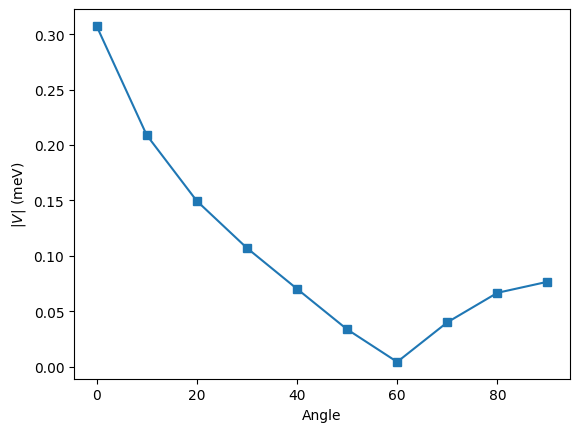

In [34]:
plt.plot(np.linspace(0, 90, 10), np.abs(v_list), marker="s")
plt.xlabel("Angle")
plt.ylabel("$|V|$ (meV)")